<a href="https://colab.research.google.com/github/manarLABIDI/Fake_News_Detection/blob/main/testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import sequence
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [28]:


# Load the model from the file
model = load_model('/content/drive/MyDrive/Fake News Detection/model.h5')




In [25]:
test_data = pd.read_csv("/content/drive/MyDrive/Fake News Detection/True.csv")
news = pd.read_csv("/content/drive/MyDrive/Fake News Detection/news.csv")

In [26]:
test_x = news["text"]


In [27]:
x = news["text"]
y = news["news_class"]


In [21]:

test_y = news["news_class"]


In [29]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, shuffle=True, random_state=11)

# Tokenize and preprocess the training data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(train_x)

tokenized_train = tokenizer.texts_to_sequences(train_x)
tokenized_test = tokenizer.texts_to_sequences(test_x)

train_x = sequence.pad_sequences(tokenized_train, maxlen=300)
test_x = sequence.pad_sequences(tokenized_test, maxlen=300)

In [30]:
prediction = model.predict(test_x)
classes_pred = np.round(prediction).flatten().astype(int)


281/281 [==============================] - 53s 186ms/step


              precision    recall  f1-score   support

           0       0.46      0.34      0.39      4640
           1       0.45      0.58      0.51      4340

    accuracy                           0.45      8980
   macro avg       0.46      0.46      0.45      8980
weighted avg       0.46      0.45      0.45      8980

[[1580 3060]
 [1835 2505]]


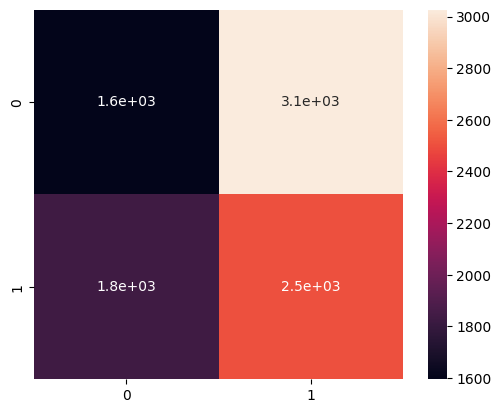

In [31]:
print(classification_report(test_y, classes_pred))
conf_mat = confusion_matrix(test_y, classes_pred)
print(conf_mat)

sns.heatmap(conf_mat, square=True, annot=True, robust=True)
plt.show()

In [61]:
example_text = "World Leaders Sign Global Agreement to Establish a Lunar Colony. In a historic announcement, world leaders from various nations have come together to sign a groundbreaking agreement to establish a permanent colony on the moon. The project aims to create a self-sustaining lunar habitat within the next decade, opening up new opportunities for scientific research, space tourism, and extraterrestrial resource mining. The leaders emphasized the potential benefits of this lunar colony, including the expansion of human civilization beyond Earth and the exploration of new frontiers. This remarkable collaboration signifies a major leap forward in space exploration and highlights humanity's ambition to conquer the cosmos."

In [62]:
tokenized_example = tokenizer.texts_to_sequences([example_text])
padded_example = sequence.pad_sequences(tokenized_example, maxlen=300)



In [64]:

# Make predictions on the example text
prediction = model.predict(padded_example)
predicted_class = "Fake" if prediction[0] >= 0.5 else "Real"


# True label for the example news article
true_label = "Real"  # Replace with the true label of the example news article

# Calculate accuracy
accuracy = 1 if predicted_class == true_label else 0

print("Predicted Class:", predicted_class)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 100ms/step
Predicted Class: Real
Accuracy: 1
